### Microtask 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
months = ['apr','may','jun','jul','aug','sep']
df = pd.DataFrame()

In [3]:
for month in months:
    df1 = pd.read_csv("uber-raw-data-"+month+"14.csv")
    df = df.append(df1, ignore_index = True)

In [4]:
df.shape

(4534327, 4)

In [5]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date/Time'])

In [8]:
df.drop(['Date/Time'],axis = 1,inplace=True)

In [9]:
df['Month'] = df.Date.dt.month
df['OnlyDate'] = df.Date.dt.date
df['DayOfTheWeek'] = df.Date.dt.weekday
df['Hour'] = df.Date.dt.hour

In [10]:
df.head()

,Lat,Lon,Base,Date,Month,OnlyDate,DayOfTheWeek,Hour
0,40.7690,-73.9549,B02512,2014-04-01 00:11:00,4,2014-04-01,1,0
1,40.7267,-74.0345,B02512,2014-04-01 00:17:00,4,2014-04-01,1,0
2,40.7316,-73.9873,B02512,2014-04-01 00:21:00,4,2014-04-01,1,0
3,40.7588,-73.9776,B02512,2014-04-01 00:28:00,4,2014-04-01,1,0
4,40.7594,-73.9722,B02512,2014-04-01 00:33:00,4,2014-04-01,1,0


D:\AnacondaandPython\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


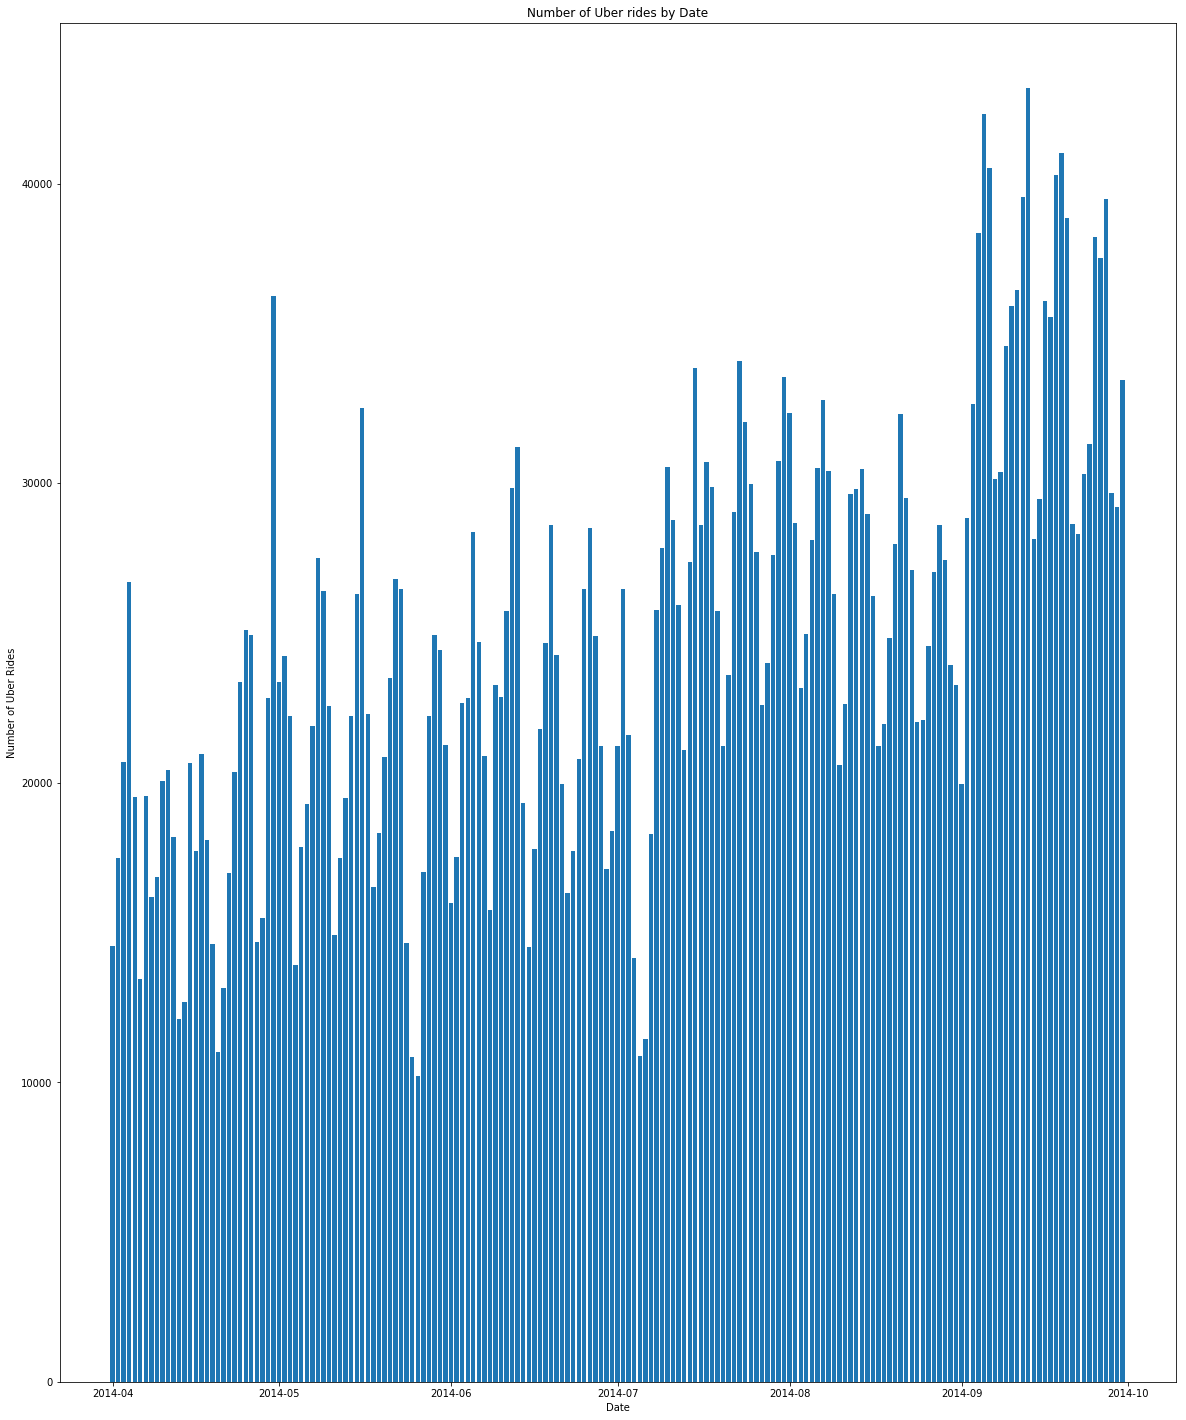

In [11]:
result = df.groupby(['OnlyDate']).size()
plt.figure(figsize = (20,25))
plt.bar(result.index , result.values)
plt.title("Number of Uber rides by Date")
plt.xlabel("Date")
plt.ylabel("Number of Uber Rides")
plt.show()

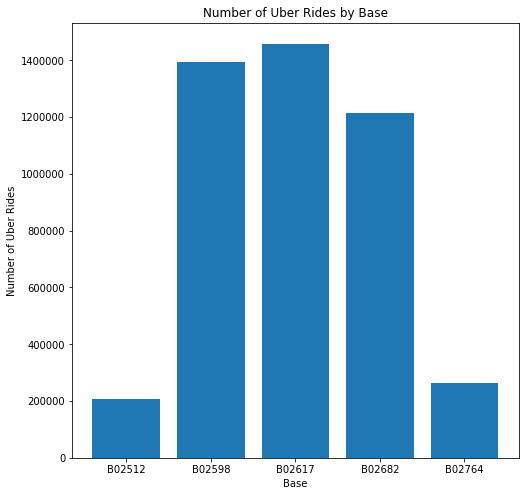

In [12]:
result = df.groupby(['Base']).size()
plt.figure(figsize = (8,8))
plt.bar(result.index , result.values)
plt.title("Number of Uber Rides by Base")
plt.xlabel("Base")
plt.ylabel("Number of Uber Rides")
plt.show()

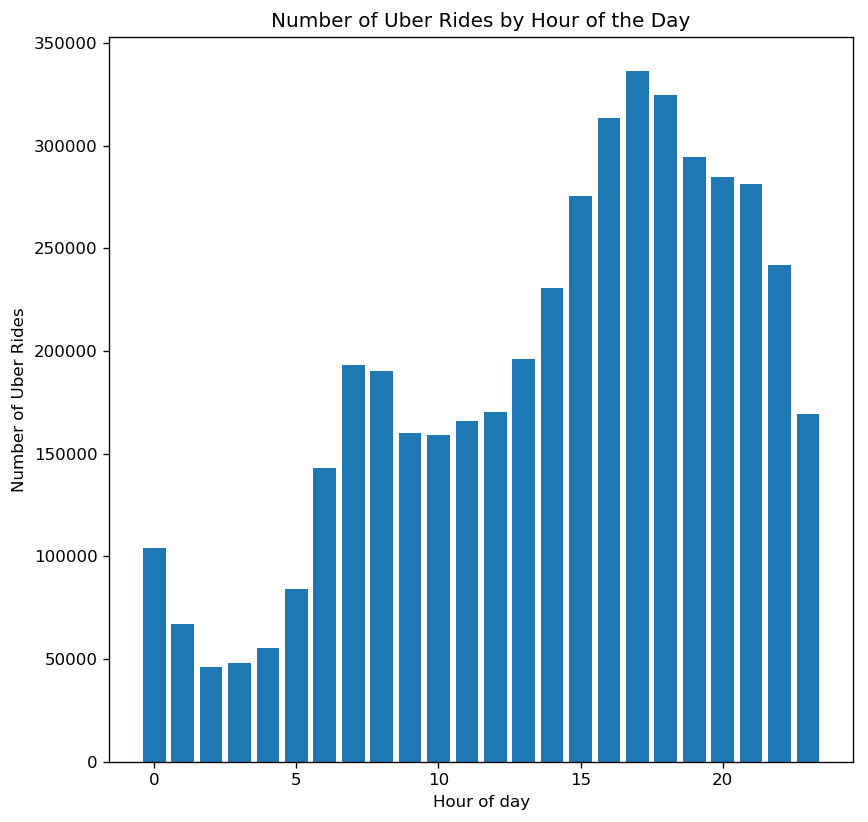

In [76]:
result = df.groupby(['Hour']).size()
plt.figure(figsize = (8,8))
plt.bar(result.index , result.values)
plt.title("Number of Uber Rides by Hour of the Day")
plt.xlabel("Hour of day")
plt.ylabel("Number of Uber Rides")
plt.show()

### Microtask 2

In [13]:
df.isna().sum()

Lat             0
Lon             0
Base            0
Date            0
Month           0
OnlyDate        0
DayOfTheWeek    0
Hour            0
dtype: int64

In [14]:
df.drop(['Lat','Lon'],axis=1, inplace=True)
df.head()

,Base,Date,Month,OnlyDate,DayOfTheWeek,Hour
0,B02512,2014-04-01 00:11:00,4,2014-04-01,1,0
1,B02512,2014-04-01 00:17:00,4,2014-04-01,1,0
2,B02512,2014-04-01 00:21:00,4,2014-04-01,1,0
3,B02512,2014-04-01 00:28:00,4,2014-04-01,1,0
4,B02512,2014-04-01 00:33:00,4,2014-04-01,1,0


In [15]:
df_onlyDate = df.groupby('OnlyDate',as_index = False)['Month'].count()
df_onlyDate.columns = ['Date','Count']

In [16]:
df_onlyDate

,Date,Count
0,2014-04-01,14546
1,2014-04-02,17474
2,2014-04-03,20701
3,2014-04-04,26714
4,2014-04-05,19521
...,...,...
178,2014-09-26,37504
179,2014-09-27,39468
180,2014-09-28,29656
181,2014-09-29,29201


In [17]:
df_DateTime = df.groupby(['OnlyDate','Hour'],as_index = False)['Month'].count()
df_DateTime.columns = ['Date','Hour','Count']

In [18]:
df_DateTime

,Date,Hour,Count
0,2014-04-01,0,138
1,2014-04-01,1,66
2,2014-04-01,2,53
3,2014-04-01,3,93
4,2014-04-01,4,166
...,...,...,...
4386,2014-09-30,18,2625
4387,2014-09-30,19,2404
4388,2014-09-30,20,2246
4389,2014-09-30,21,1961


In [19]:
y_onlyDate = df_onlyDate['Count']
X_onlyDate = df_onlyDate.drop(['Count'],axis = 1)

X_train_onlyDate = X_onlyDate[:int(X_onlyDate.shape[0]*0.9)]
X_test_onlyDate = X_onlyDate[int(X_onlyDate.shape[0]*0.9):]
y_train_onlyDate = y_onlyDate[:int(X_onlyDate.shape[0]*0.9)]
y_test_onlyDate = y_onlyDate[int(X_onlyDate.shape[0]*0.9):]

In [20]:
y_DateTime = df_DateTime['Count']
X_DateTime = df_DateTime.drop(['Count'],axis = 1)

X_train_DateTime = X_DateTime[:int(X_DateTime.shape[0]*0.9)]
X_test_DateTime = X_DateTime[int(X_DateTime.shape[0]*0.9):]
y_train_DateTime = y_DateTime[:int(X_DateTime.shape[0]*0.9)]
y_test_DateTime = y_DateTime[int(X_DateTime.shape[0]*0.9):]

### Microtask 3

In [21]:
train_onlyDate = df_onlyDate[:int(df_onlyDate.shape[0]*0.9)]
test_onlyDate = df_onlyDate[int(df_onlyDate.shape[0]*0.9):]

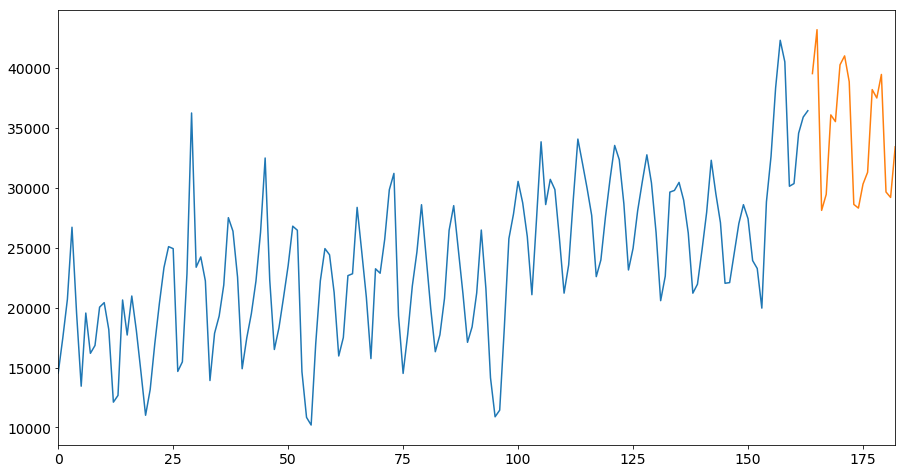

In [22]:
train_onlyDate.Count.plot(figsize=(15,8), fontsize=14)
test_onlyDate.Count.plot(figsize=(15,8), fontsize=14)
plt.show()

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

D:\AnacondaandPython\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


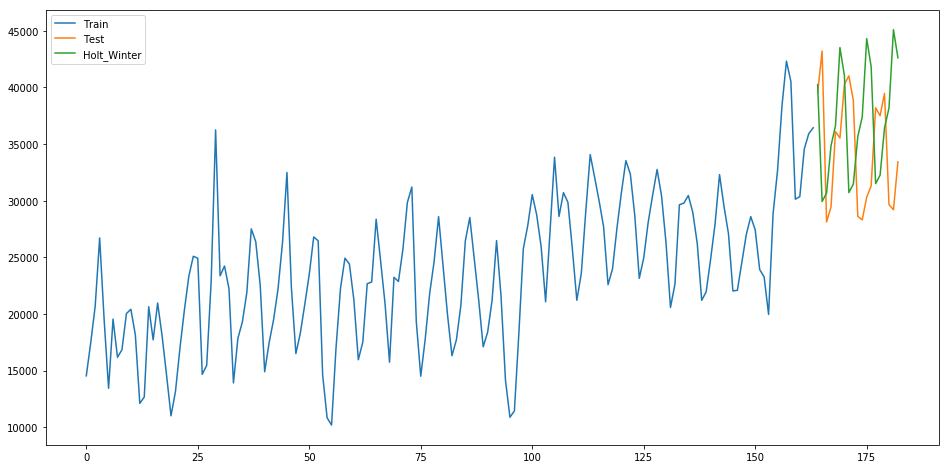

In [24]:
y_hat_avg = test_onlyDate.copy()
fit1 = ExponentialSmoothing(np.asarray(train_onlyDate['Count']) ,seasonal_periods=6 ,trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_onlyDate))
plt.figure(figsize=(16,8))
plt.plot( train_onlyDate['Count'], label='Train')
plt.plot(test_onlyDate['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

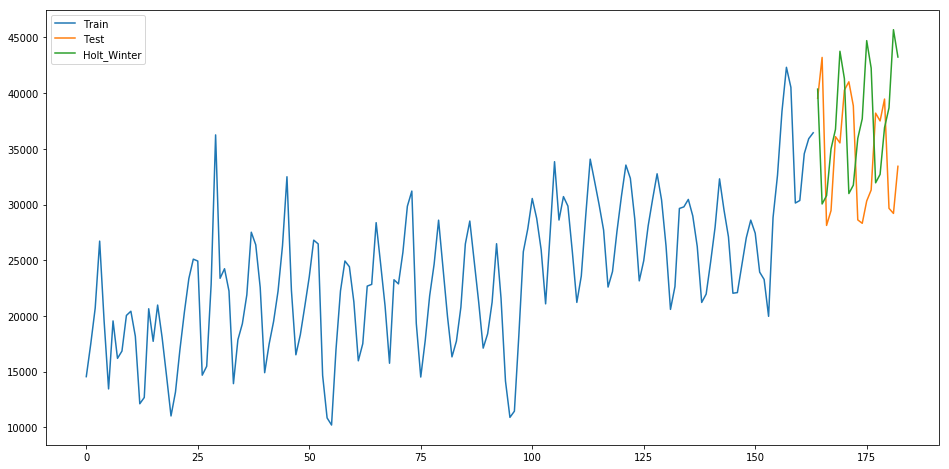

In [25]:
y_hat_avg = test_onlyDate.copy()
fit1 = ExponentialSmoothing(np.asarray(train_onlyDate['Count']) ,seasonal_periods=6 ,trend='mul', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_onlyDate))
plt.figure(figsize=(16,8))
plt.plot( train_onlyDate['Count'], label='Train')
plt.plot(test_onlyDate['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

### Microtask 4

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_onlyDate.Count.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.703280
p-value: 0.845898


since p-value > 0.05, we need to find the order of differencing

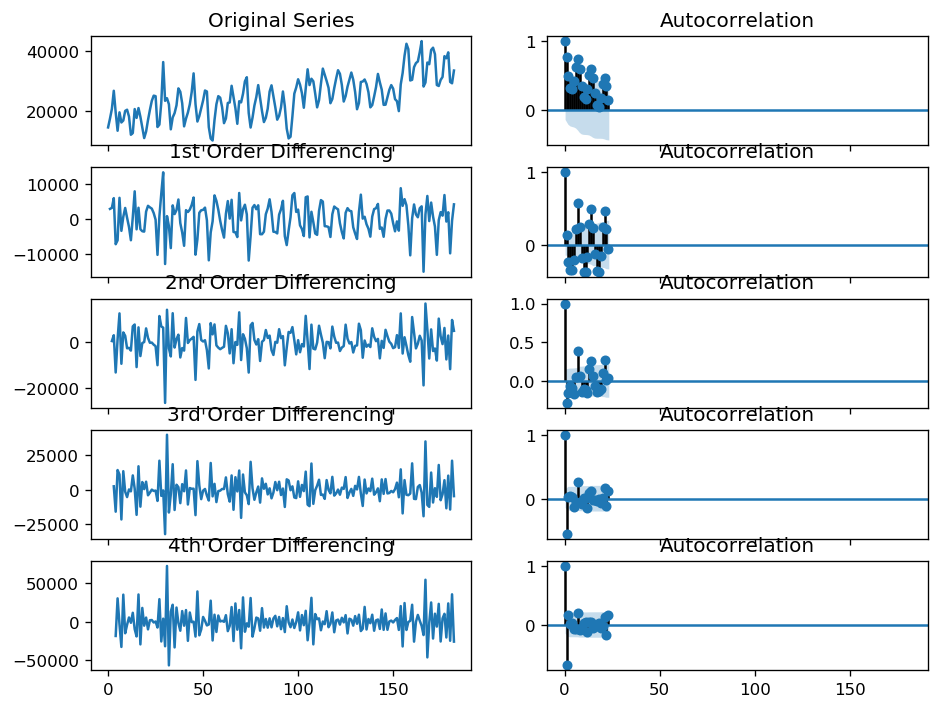

In [28]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(df_onlyDate.Count); axes[0, 0].set_title('Original Series')
plot_acf(df_onlyDate.Count, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_onlyDate.Count.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_onlyDate.Count.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_onlyDate.Count.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_onlyDate.Count.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df_onlyDate.Count.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df_onlyDate.Count.diff().diff().diff().dropna(), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(df_onlyDate.Count.diff().diff().diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(df_onlyDate.Count.diff().diff().diff().diff().dropna(), ax=axes[4, 1])

plt.show()

Looking at the above graph we shall take d = 1

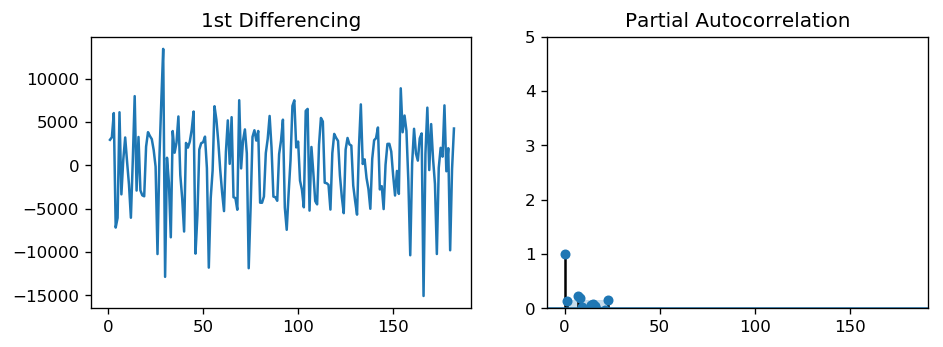

In [29]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_onlyDate.Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_onlyDate.Count.diff().dropna(), ax=axes[1])

plt.show()

From above, we will fix p = 1

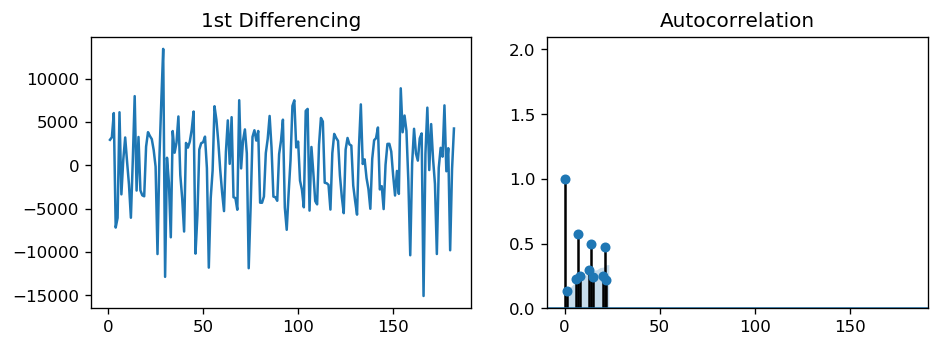

In [30]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_onlyDate.Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,2.1))
plot_acf(df_onlyDate.Count.diff().dropna(), ax=axes[1])

plt.show()

From above, we will fix q = 1

AR MODEL

In [31]:
train_onlyDate = df_onlyDate.Count[:int(df_onlyDate.shape[0]*0.9)]
test_onlyDate = df_onlyDate.Count[int(df_onlyDate.shape[0]*0.9):]

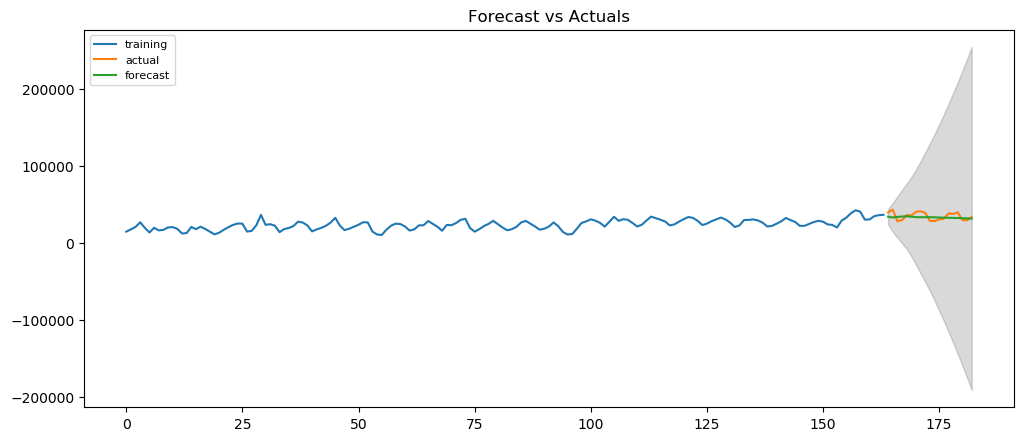

In [32]:
model = ARIMA(train_onlyDate, order=(4, 2, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(19, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_onlyDate.index)
lower_series = pd.Series(conf[:, 0], index=test_onlyDate.index)
upper_series = pd.Series(conf[:, 1], index=test_onlyDate.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_onlyDate, label='training')
plt.plot(test_onlyDate, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

MA MODEL

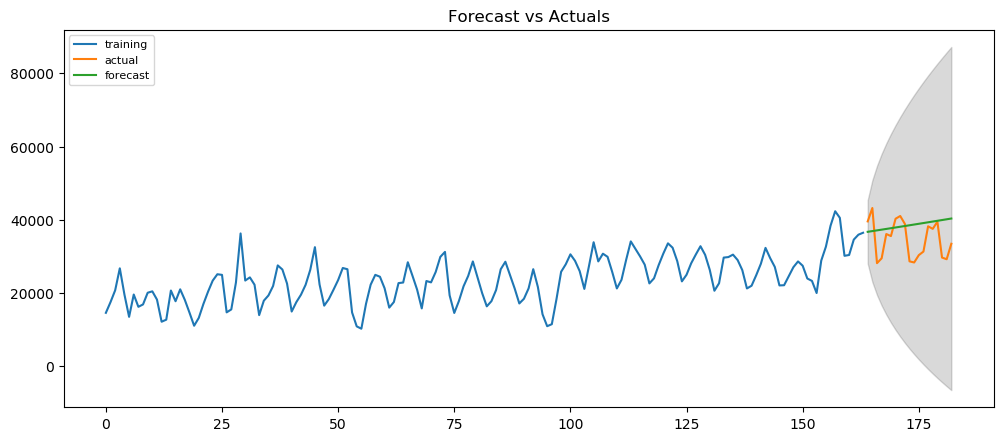

In [33]:
model = ARIMA(train_onlyDate, order=(0, 2, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(19, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_onlyDate.index)
lower_series = pd.Series(conf[:, 0], index=test_onlyDate.index)
upper_series = pd.Series(conf[:, 1], index=test_onlyDate.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_onlyDate, label='training')
plt.plot(test_onlyDate, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

COMBINED MODEL

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


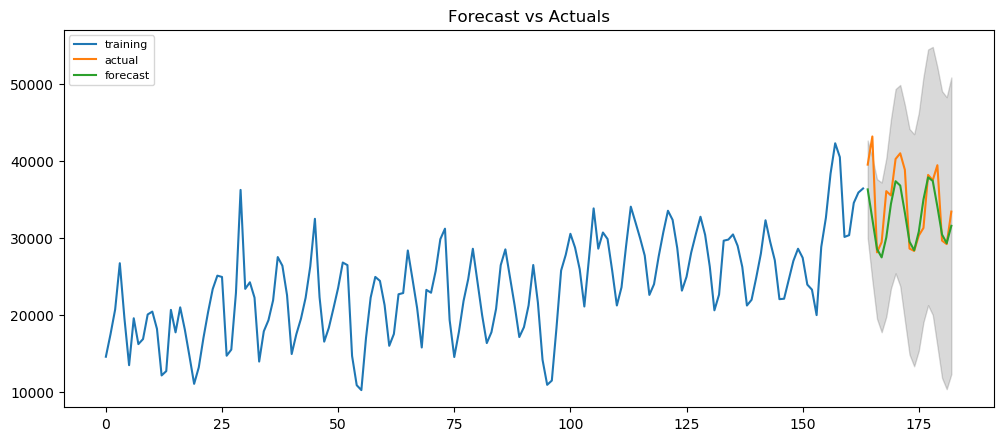

In [34]:
model = ARIMA(train_onlyDate, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(19, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_onlyDate.index)
lower_series = pd.Series(conf[:, 0], index=test_onlyDate.index)
upper_series = pd.Series(conf[:, 1], index=test_onlyDate.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_onlyDate, label='training')
plt.plot(test_onlyDate, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
rmse = np.mean((fc - test_onlyDate)**2)**.5 
print("RMSE " + str(rmse))

RMSE 3790.024451672444


### Microtask 5

In [36]:
df_DateTime

,Date,Hour,Count
0,2014-04-01,0,138
1,2014-04-01,1,66
2,2014-04-01,2,53
3,2014-04-01,3,93
4,2014-04-01,4,166
...,...,...,...
4386,2014-09-30,18,2625
4387,2014-09-30,19,2404
4388,2014-09-30,20,2246
4389,2014-09-30,21,1961


In [37]:
df_DateTime['Count'].max()

3437

In [38]:
df_DateTime['Count'].min()

45

In [39]:
df_DateTime.shape

(4391, 3)

In [40]:
conditions = [
    (df_DateTime['Count'] >= 45) & (df_DateTime['Count'] <= 394),
    (df_DateTime['Count'] > 394) & (df_DateTime['Count'] <= 787),
    (df_DateTime['Count'] > 787) & (df_DateTime['Count'] <= 1134),
    (df_DateTime['Count'] > 1134) & (df_DateTime['Count'] <= 1587),
    (df_DateTime['Count'] > 1587) & (df_DateTime['Count'] <= 3437)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2, 3, 4]

# create a new column and use np.select to assign values to it using our lists as arguments
df_DateTime['Class'] = np.select(conditions, values)

# display updated DataFrame
df_DateTime.head()

,Date,Hour,Count,Class
0,2014-04-01,0,138,0
1,2014-04-01,1,66,0
2,2014-04-01,2,53,0
3,2014-04-01,3,93,0
4,2014-04-01,4,166,0


In [41]:
df_DateTime['Date'] = pd.to_datetime(df_DateTime['Date'])

In [42]:
df_DateTime['Month'] = df_DateTime.Date.dt.month
df_DateTime['OnlyDate'] = df_DateTime.Date.dt.day
df_DateTime['DayOfTheWeek'] = df_DateTime.Date.dt.weekday

In [43]:
df_DateTime.dtypes

Date            datetime64[ns]
Hour                     int64
Count                    int64
Class                    int32
Month                    int64
OnlyDate                 int64
DayOfTheWeek             int64
dtype: object

In [44]:
df_DateTime.head()

,Date,Hour,Count,Class,Month,OnlyDate,DayOfTheWeek
0,2014-04-01,0,138,0,4,1,1
1,2014-04-01,1,66,0,4,1,1
2,2014-04-01,2,53,0,4,1,1
3,2014-04-01,3,93,0,4,1,1
4,2014-04-01,4,166,0,4,1,1


In [49]:
df_DateTime.drop(['Date'],axis = 1,inplace = True)

D:\AnacondaandPython\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
df_DateTime.columns

Index(['Hour', 'Class', 'Month', 'OnlyDate', 'DayOfTheWeek', 'Count'], dtype='object')

In [54]:
cols = ['Hour', 'Month', 'OnlyDate', 'DayOfTheWeek', 'Count', 'Class']

In [55]:
df_DateTime = df_DateTime[cols]
df_DateTime.head()

,Hour,Month,OnlyDate,DayOfTheWeek,Count,Class
0,0,4,1,1,138,0
1,1,4,1,1,66,0
2,2,4,1,1,53,0
3,3,4,1,1,93,0
4,4,4,1,1,166,0


In [59]:
X = df_DateTime.iloc[:,:5].values
y = df_DateTime.iloc[:,5:6].values

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [61]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3951/3951 [==============================] - 4s 1ms/step - loss: 1.5667 - acc: 0.2541
Epoch 2/100
3951/3951 [==============================] - 0s 35us/step - loss: 1.3945 - acc: 0.4156
Epoch 3/100
3951/3951 [==============================] - 0s 46us/step - loss: 1.1667 - acc: 0.5373
Epoch 4/100
3951/3951 [==============================] - 0s 46us/step - loss: 0.9846 - acc: 0.5892
Epoch 5/100
3951/3951 [==============================] - 0s 47us/step - loss: 0.8401 - acc: 0.6824: 0s - loss: 0.8954 - acc: 0.6
Epoch 6/100
3951/3951 [==============================] - 0s 46us/step - loss: 0.7164 - acc: 0.7573
Epoch 7/100
3951/3951 [==============================] - 0s 42us/step - loss: 0.6173 - acc: 0.8140
Epoch 8/100
3951/3951 [==============================] - 0s 35us/step - loss: 0.5408 - acc: 0.8411
Epoch 9/100
3951/3951 [==============================] - 0s 30us/step - loss: 0.4756 - acc: 0.8674
Epoch 10/100
3951/3951 [========

3951/3951 [==============================] - 0s 31us/step - loss: 0.0495 - acc: 0.9884
Epoch 80/100
3951/3951 [==============================] - 0s 29us/step - loss: 0.0491 - acc: 0.9886
Epoch 81/100
3951/3951 [==============================] - 0s 30us/step - loss: 0.0484 - acc: 0.9899
Epoch 82/100
3951/3951 [==============================] - 0s 30us/step - loss: 0.0479 - acc: 0.9894
Epoch 83/100
3951/3951 [==============================] - 0s 31us/step - loss: 0.0487 - acc: 0.9884
Epoch 84/100
3951/3951 [==============================] - 0s 30us/step - loss: 0.0464 - acc: 0.9899
Epoch 85/100
3951/3951 [==============================] - 0s 30us/step - loss: 0.0464 - acc: 0.9899: 0s - loss: 0.0458 - acc: 0.99
Epoch 86/100
3951/3951 [==============================] - 0s 30us/step - loss: 0.0462 - acc: 0.9889
Epoch 87/100
3951/3951 [==============================] - 0s 31us/step - loss: 0.0454 - acc: 0.9911
Epoch 88/100
3951/3951 [==============================] - 0s 30us/step - loss: 0.0

In [74]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [75]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 98.4090909090909
